# Complexity Barabasi-Albert Sandpile model

**The code Immediately below is to run the simulation, it doesn't need to be done again.**

In [2]:
from Classes import *
from collections import OrderedDict as odict
import pickle as pk
# - Obtain data for a large number of systems:
# Create a dictionary of piles

All_data = odict()

sys_4 = System(4)
sys_8 = System(8)
sys_16 = System(16)
sys_32 = System(32)
sys_64 = System(64)
sys_128 = System(128)
sys_256 = System(256)
sys_512 = System(512)

all_sys = (sys_4,sys_8,sys_16,sys_32,sys_64,sys_128,sys_256,sys_512)

# Add grains to piles until they are in the steady state, then add 200,000
# more grains.

for sys in all_sys:
    print(sys.size)
    dictionary = {'h':[], 's':[]}
    time = 0
    
    while sys.reach_edge == False:
#        time += 1
        sys.add_grain()
        dictionary['h'].append(sys.h[-1])
        dictionary['s'].append(sys.ava_sizes[-1])
    
    for k in range(200000):
        
        sys.add_grain()
        dictionary['h'].append(sys.h[-1])
        dictionary['s'].append(sys.ava_sizes[-1])
    
    All_data[sys.size] = dictionary
    
pk.dump(All_data,open('INSERT NAME', 'wb'))

#We are in the steady state mode for 200,000 grains.

# Import Data

In [20]:
import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, '/Users/joelmcfarlane/Library/Mobile Documents/com~apple~CloudDocs/Documents\
/Imperial Physics year 3/Lecture Notes Y3/Complexity and Networks/Complexity/Project')

In [53]:


from collections import OrderedDict as odict
from Classes import *
import pickle as pk
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
sns.set()

plt.rcParams['figure.figsize'] = [10, 5]
filepath = '/Users/joelmcfarlane/Library/Mobile Documents/com~apple~CloudDocs/Documents\
/Imperial Physics year 3/Lecture Notes Y3/Complexity and Networks/Complexity/Project/'


big_data = pk.load(open(filepath+'big_data', 'rb'))

New_data = pk.load(open(filepath+'data_computer', 'rb'))

Final_data = pk.load(open(filepath+'data_computer', 'rb'))

test_data0 = pk.load(open(filepath+'data_full_0','rb'))
test_data1 = pk.load(open(filepath+'data_full_1','rb'))
test_data2 = pk.load(open(filepath+'data_full_2','rb'))

# Initial Test:

Find initial pile height:

In [28]:
L = []
av_s = []
error = []

for length, dictionary in Final_data.items():
    L.append(length)
    av_s.append(np.mean(dictionary['s'][int(len(dictionary['h']) / 5):]))
    error.append(np.std(dictionary['s'][int(len(dictionary['h']) / 5):]) / 
                 len(dictionary['h'])**0.5)
    
df = pd.DataFrame(list(zip(L,av_s,error)),columns = \
                  ['Length','Average s in steady state','Standard error'])

print(df)

   Length  Average s in steady state  Standard error
0       4                   3.660714        0.741027
1       8                   7.718750        1.058066
2      16                  15.701250        1.394782
3      32                  31.504651        2.110161
4      64                  63.278640        3.255969
5     128                 127.675904        4.759562
6     256                 255.425924        7.474203


# Task 2A:

### Plot height vs number of grains added.

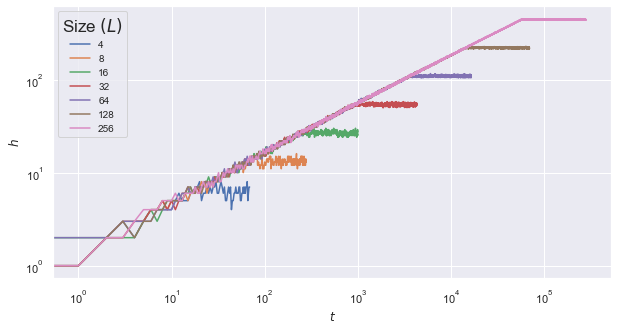

In [54]:
for length, dictionary in Final_data.items():
    plt.loglog(dictionary['h'], label=length)
#    plt.loglog(dictionary['h'], label=length)

plt.xlabel("$t$")
plt.ylabel("$h$")

plt.legend(loc=0, title="Size $(L)$", framealpha=0.8, prop={'size':10})
plt.show()

# Task 2b:

### Find $t_c(L)$

Note $5t_c$ grains were added to the system.

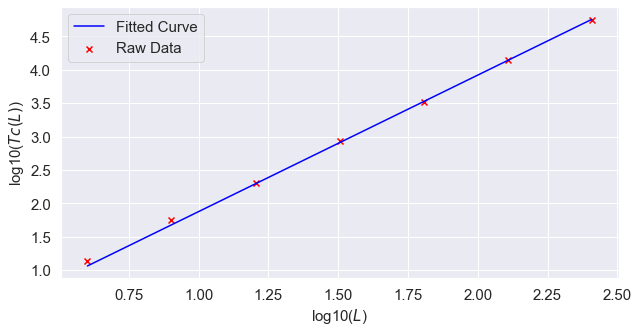

In [55]:
L = []
Tc = []
for length, dictionary in Final_data.items():
    L.append(length)
    Tc.append(len(dictionary['h']) / 5)
    
L = np.array(L)
Tc = np.array(Tc)
    
#plt.loglog(L,Tc,marker = 'x',c='red')
plt.scatter(np.log10(L),np.log10(Tc),label='Raw Data',marker='x',c='red')

fit = np.polyfit(np.log10(L[-3:]),np.log10(Tc[-3:]),1)
plt.plot(np.log10(L),fit[0]*np.log10(L) + fit[1],label = 'Fitted Curve',c='blue')

plt.xlabel('log10($L$)',fontsize = 15)
plt.ylabel('log10($Tc(L)$)',fontsize = 15)
plt.tick_params(axis='both',labelsize=15)

plt.legend(loc='best',prop={'size': 15})

# Task 2c:


### Create a scaling function to relate h and Tc.

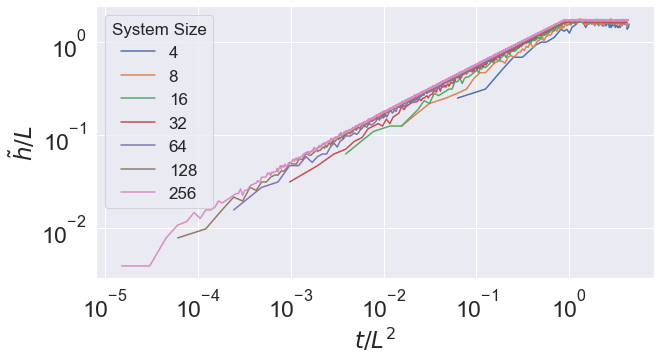

In [56]:
# Create smoothed out data, over 4 different data sets:
Smooth_data = odict()

size_list = [4,8,16,32,64,128,256]

for size in size_list:
    
    dictionary = {'h':[]}
    
    length = min(len(test_data0[size]['h']),len(test_data1[size]['h']),\
                 len(test_data2[size]['h']),len(Final_data[size]['h']))
    
    dictionary['h'] = np.mean([np.array(test_data0[size]['h'][:length]),\
              np.array(test_data1[size]['h'][:length]),\
              np.array(test_data2[size]['h'][:length]),\
              np.array(Final_data[size]['h'][:length])],axis = 0)
    
    Smooth_data[size] = dictionary
    
    
#Plot smoothed data
# Then plot the graph, as discussed on paper from TASK 2C

for length, dictionary in Smooth_data.items():
    mov = dictionary['h']
    t = np.arange(1,len(dictionary['h'])+1)
    plt.loglog(t / ( length**2), mov / length,label = length)
    
    
plt.rcParams['legend.title_fontsize'] = 17
plt.xlabel('$t/L^2$',fontsize = 23)
plt.ylabel("$\~h/L$",fontsize = 23)
plt.tick_params(axis='both',labelsize=23)
plt.legend(loc='best',title='System Size',prop={'size':17})

Text(0, 0.5, 'Height')

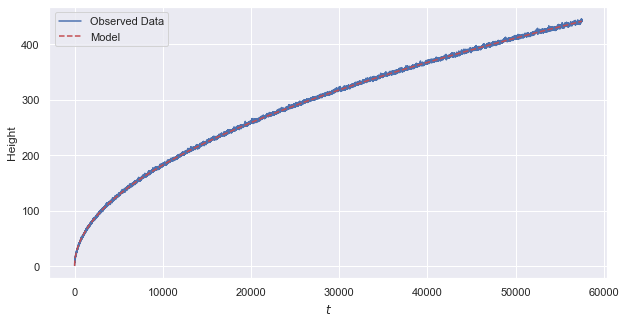

In [57]:
#%% - Look at how avg(h) increases with t during the transient state
# Use the largest system size as this most clearly shows the switch between 
# steady state and transient behavior. - TASK 2C continued.

h_256 = Final_data[256]['h'][:-4*int(len(dictionary['h']) / 5)]
popt,pcov = curve_fit(power,np.arange(len(h_256)),h_256)

plt.plot(h_256,label = 'Observed Data')
plt.plot(power(np.arange(len(h_256)),popt[0],popt[1]),'r--',label = 'Model')

plt.legend(loc = 'best')
plt.xlabel('$t$')
plt.ylabel('Height')

 
# We can quite clearly see that the power law fits the transient data.

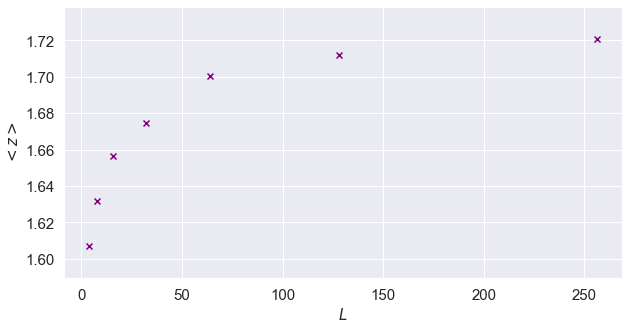

In [58]:
#%% - EXTENSION: Find average z

mean_zs = []
L = []

for length, dictionary in Final_data.items():

    mean_z = np.mean(dictionary['h'][-int(len(dictionary['h']) / 5):])/length
    mean_zs.append(mean_z)
    L.append(length)
    
plt.scatter(L,mean_zs,marker = 'x',color= 'purple')
plt.xlabel('$L$',fontsize = 15)
plt.ylabel('$<z>$',fontsize = 15)
plt.tick_params(axis='both',labelsize=15)

# Task 2E:


a0  = 1.7466371877053102
a1  = 0.1756917609273243
w1  = 0.44704607423915754


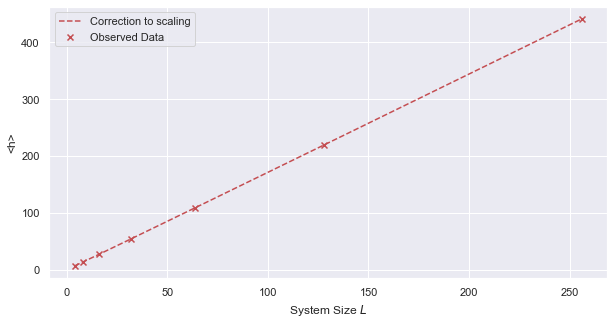

In [59]:
#%% - Calculate the average height and standard deviation for each L:

stds = []
means = []
Ls = []

for length, dictionary in Final_data.items():
    steady_hs = dictionary['h'][-int(len(dictionary['h']) / 5):]   # Last 200,000 values are in steady
                                            # state.
    stds.append(np.std(steady_hs))
    means.append(np.mean(steady_hs))
    Ls.append(length)
    
df = pd.DataFrame(list(zip(Ls,stds,means)),columns = \
                  ['Length','Standard dev','Mean'])

plt.scatter(df['Length'],df['Mean'],label =\
            'Observed Data',c='r',marker='x')
plt.xlabel('System Size $L$')
plt.ylabel('<h>')


popt, pcov = curve_fit(scale_func,df['Length'],df['Mean'])

print('a0  =',popt[0])
print('a1  =',popt[1])
print('w1  =',popt[2])

plt.plot(df['Length'],scale_func(df['Length'],\
         popt[0],popt[1],popt[2]),'r--',label = 'Correction to scaling')

plt.legend(loc = 'best')

Text(0, 0.5, '<h>/a0L')

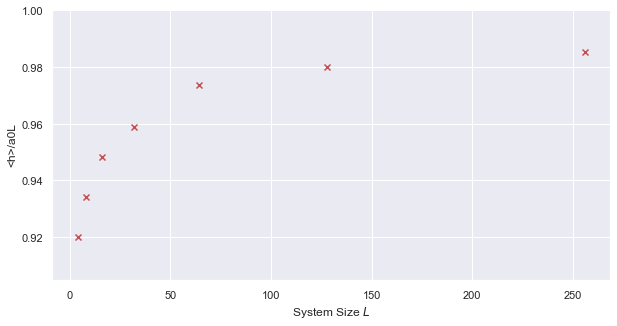

In [60]:
#%% - More tests

# If we have no corrections to scaling, when we divide the y-axis by a0L, we 
# should get a constant value.

plt.scatter(df['Length'],df['Mean']/(popt[0]*df['Length']),label =\
            'Observed Data',c='r',marker='x')

plt.xlabel('System Size $L$')
plt.ylabel('<h>/a0L')

# Here we can clearly see that corrections to scaling exist, especially for
# small values of system size L. TALK TO DEMONSTRATOR ABOUT THIS

# Task 2F:

Text(0, 0.5, '$\\sigma$')

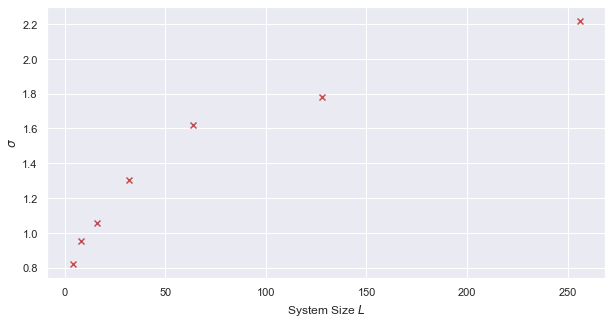

In [61]:
#%% - TASK 2F

# First plot the system size against the standard deviation for that size.

plt.scatter(df['Length'],df['Standard dev'],label =\
            'Observed Data',c='r',marker = 'x')

plt.xlabel('System Size $L$')
plt.ylabel('$\sigma$')

# It can clearly be seen from this plot that the fit is not linear,
# so try and plot this on a loglog scale, as it looks like a power law.

A =  0.5612712593658993
s =  0.24576331006842062
The power is 0.24576331006842062


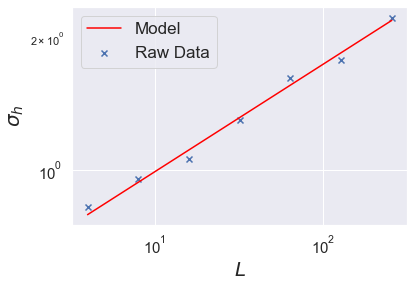

In [43]:
#%% - Fit to a power law
popt, pcov = curve_fit(power, df['Length'][-4:],df['Standard dev'][-4:])

print('A = ',popt[0])
print('s = ',popt[1])

plt.scatter(df['Length'],df['Standard dev'],\
           marker = 'x',color = 'b',label = 'Raw Data')
plt.plot(df['Length'],power(df['Length'],popt[0],popt[1]),color='red',label = 'Model')


plt.ylabel('$\sigma_h$')

plt.yscale('log')
plt.xscale('log')

plt.legend(loc='best')

plt.xlabel('$L$',fontsize = 20)
plt.ylabel('$\sigma_h$',fontsize = 20)
plt.tick_params(axis='both',labelsize=15)
plt.legend(loc='best',prop={'size':17})

print('The power is ' + str(popt[1]))

# Seems to be quite a good fit. Next section will check the trend 

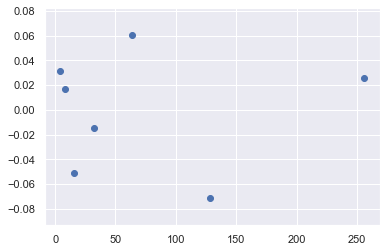

In [44]:
#%% - Test model vs raw data, by subtracting the model from the raw data and 
# looking at the trend.

plt.scatter(df['Length'],df['Standard dev'] - \
            power(df['Length'],popt[0],popt[1]))

# We can see here that there is no real order to the uncertainties, with the 
# differences suggesting the model is reasonably accurate.

# Task 2G:

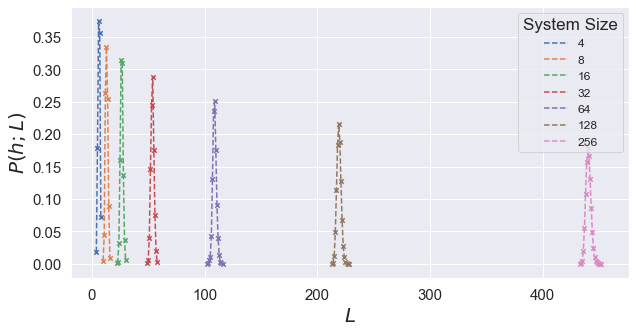

In [62]:
#%% - Create probability function for steady state. TASK 2G.
# Only take the steady state heights.

from Classes import *

for length, dictionary in Final_data.items():

    steady_hs = dictionary['h'][-4*int(len(dictionary['h']) / 5):]
    df = frequency(steady_hs)
    
    plt.plot(df['Height'],df['Probability'],linestyle='--',label = str(length))
    plt.scatter(df['Height'],df['Probability'],marker = 'x',s = 20)
    
plt.xlabel('$L$',fontsize = 20)
plt.ylabel('$P(h;L)$',fontsize = 20)
plt.tick_params(axis='both',labelsize=15)
plt.legend(loc='best',prop={'size':17})

plt.tick_params(axis='both',labelsize=15)
plt.legend(loc='best',title= 'System Size',prop={'size':12})
        
# Now try and data collapse the probability functions, using theoretical model.

Sigma is 1.0034972368522375


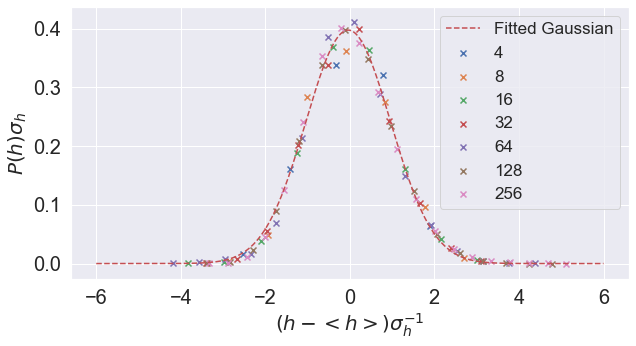

In [63]:
#%% - Task 2G continued, create a scaling function.
# Use the fitted values from std and <h> to create a data collapse.


y_axis = np.array([])
x_axis = np.array([])

for length, dictionary in Final_data.items():
    
    steady_hs = dictionary['h'][-4*int(len(dictionary['h']) / 5):]
    df = frequency(steady_hs)
    
    plt.scatter((df['Height'] -np.mean(steady_hs))*np.std(steady_hs)**-1 \
             , df['Probability']*np.std(steady_hs),marker = 'x' ,label = length)
    
    x_axis = np.append(x_axis,(df['Height'] -\
                               np.mean(steady_hs))*np.std(steady_hs)**-1)
    y_axis = np.append(y_axis,df['Probability']*np.std(steady_hs))


popt,pcov = curve_fit(gaussian,x_axis,y_axis)
plt.plot(np.arange(-6,6,0.001),gaussian(np.arange(-6,6,0.001)\
                         ,popt[0],popt[1]),'r--',label = 'Fitted Gaussian')
    
    
#    plt.plot((df['Height'] -np.mean(steady_hs)) \
#             , df['Probability'] ,label = length)
plt.tick_params(axis='both',labelsize=20)
plt.legend(loc='best',prop={'size':17})
plt.xlabel('$(h - <h>) \sigma_h^{-1}$',fontsize = 20)
plt.ylabel('$P(h) \sigma_h$',fontsize = 20)

print('Sigma is ' + str(popt[0]))

# Data collapse does trace out the expected pattern
# Distribution with small L's looks like the expected districution less,
# which is expected.
# Shape is Gaussian.

    
    

# Task 3A:


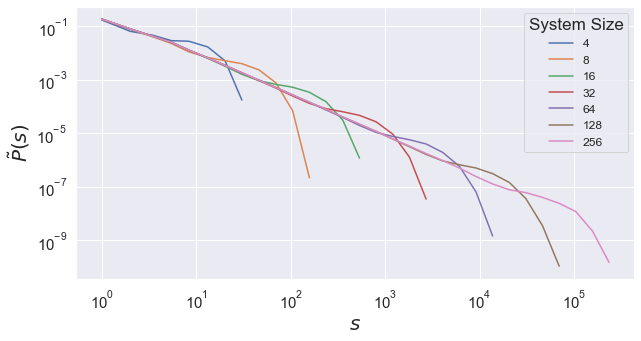

In [64]:
#%% - TASK 3A: Log-binning data

# Note as mentioned in the notes, only use the steady state avalanches.

for length, dictionary in big_data.items():
    
    x,y = logbin(dictionary['s'][-1000000:],1.5)
    plt.loglog(x,y,label = length)
    
#    df = frequency(dictionary['s'])
#    plt.loglog(df['Height'],df['Probability'],label = 'length')
#    plt.loglog(df['Height'],df['Probability'],label = 'length')
    
plt.xlabel('$s$',fontsize = 20)
plt.ylabel('$\~P(s)$',fontsize = 20)

plt.legend(loc='best',title = 'System Size',prop={'size':17})

plt.tick_params(axis='both',labelsize=15)
plt.legend(loc='best',title= 'System Size',prop={'size':12})

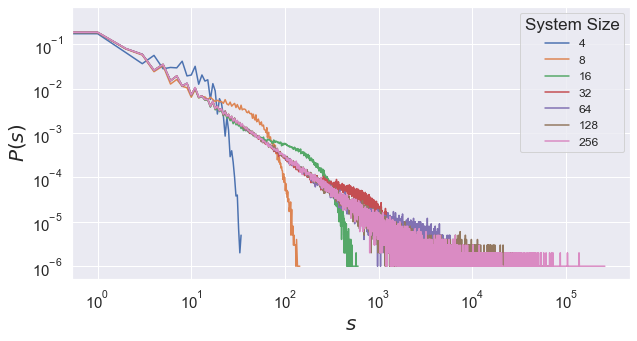

In [65]:
#%% - Plot without log bin
for length, dictionary in big_data.items():
    
#    plt.plot(np.log10(dictionary['s']),np.log10(y),label = length)
    
    df = frequency(dictionary['s'][-1000000:])
    plt.loglog(df['Height'],df['Probability'],label = length)
#    plt.loglog(df['Height'],df['Probability'],label = 'length')
    
plt.xlabel('$s$',fontsize = 20)
plt.ylabel('$P(s)$',fontsize = 20)
plt.tick_params(axis='both',labelsize=20)



plt.legend(loc='best',title = 'System Size',prop={'size':17})

plt.tick_params(axis='both',labelsize=15)
plt.legend(loc='best',title= 'System Size',prop={'size':12})

# Task 3B:

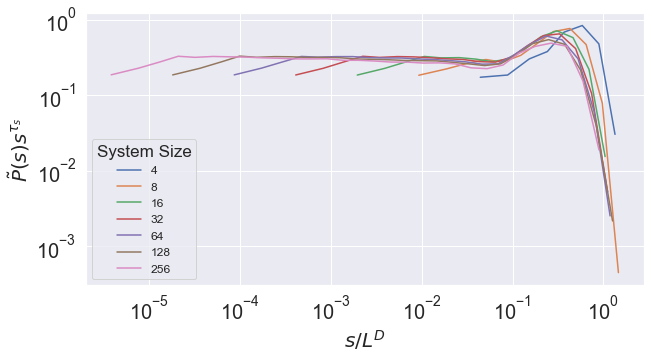

In [66]:
#%% - TASK 3B: Scaling function.

# Is the log binned probability consistent with the finite scaling ansatz.

# We multiply the probability by the mid bin size s. We divide the avalanche


D = 2.25
tau = 1.51


# size by the L to the power of D.
for length, dictionary in big_data.items():
    
    x,y = logbin(dictionary['s'][-1000000:],1.5)
    
    plt.plot(x / (length**D),y * x**tau,\
                label = length)
    
#    df = frequency(dictionary['s'])
#    plt.loglog(df['Height'],df['Probability'],label = 'length')
#    plt.loglog(df['Height'],df['Probability'],label = 'length')
    
plt.xlabel('$s / L^D$',fontsize = 20)
plt.ylabel('$\~P(s) s^{\\tau_s}$',fontsize = 20)

plt.xscale('log')
plt.yscale('log')
plt.tick_params(axis='both',labelsize=20)

plt.legend(loc='best',title = 'System Size',prop={'size':12})

# Task 3C:

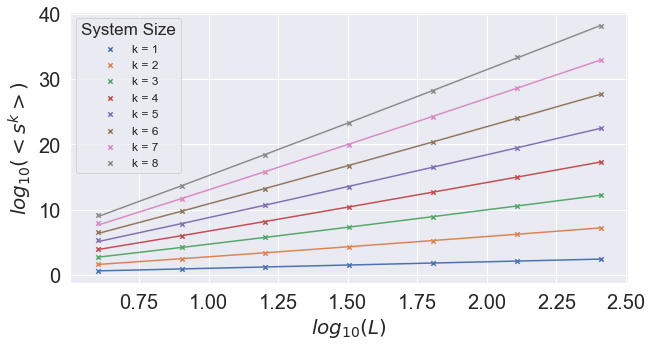

In [69]:
#%% - TASK 3C: Measuring the kth moment.

k_s = [1,2,3,4,5,6,7,8]
L = np.array([4,8,16,32,64,128,256],dtype='float64')

# Create a dataframe that shows the average of the kth moment for every system
# size.

s_k_list = []

for k in k_s:
    
    moments = []
    
    for length, dictionary in big_data.items():
        
        arr = np.array(dictionary['s'][-1000000:]\
                       ,dtype='float64')
        arr = np.float_power(arr,k)
#        print(min(arr))
        s_k = np.mean(arr)
        
        moments.append(s_k)
    
    s_k_list.append(moments)


moment_df =  pd.DataFrame(s_k_list)
moment_df.columns = ['L=4','L=8','L=16','L=32','L=64','L=128','L=256']
moment_df_ = moment_df.rename(index={0:'k=1',1:'k=2',2:'k=3',3:'k=4'})
moment_df = moment_df.transpose()

# Transpose dataframe so that it can be plotted easily.


# Create lists of gradients for use later.

gradients = []
for i in range(len(k_s)):
    # Fit the graphs with a power law at first.
    
    plt.scatter(np.log10(L),np.log10(moment_df[i]),\
                label = 'k = ' + str(k_s[i]),marker = 'x',s=20)
    popt,pcov = curve_fit(power,np.log10(L)[-3:],np.log10(moment_df[i][-3:]))
    gradients.append(popt[0])
    plt.plot(np.log10(L),power(np.log10(L),popt[0],popt[1]))
    
# Note that python has had big issues with massive numbers. To get over this,
    # I fit the log of the values and not the actual values
    
    
plt.xlabel('$log_{10}(L)$',fontsize = 20)
plt.ylabel('$log_{10}(<s^k>)$',fontsize = 20)

plt.tick_params(axis='both',labelsize=20)

plt.legend(loc='best',title = 'System Size',prop={'size':12})

Note the next box was not included in the final report.

RuntimeError: Optimal parameters not found: gtol=0.000000 is too small, func(x) is orthogonal to the columns of
  the Jacobian to machine precision.

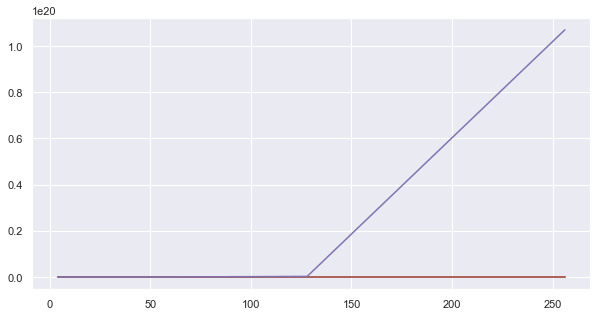

In [68]:
#%% - TASK 3C: Corrections to scaling.

"To check for corrections to scaling, divide measured values by fit. "
"If there are corrections, we will see larger deviations for small L."


k_s = [1,2,3,4,5,6,7,8]
for i in range(len(k_s)):
    # Fit the graphs with a power law at first.
    
    popt,pcov = curve_fit(power,L,moment_df[i])

    plt.plot(L,moment_df[i] / \
             power(L,popt[0],popt[1]),label = k_s[i])

plt.legend(loc='best')

plt.ylabel('Raw Data / Fit')
plt.xlabel('$L$')

D = 2.0375880279194307
Error = 0.01709561617703495
Tau = 1.6376523618537853
Error = 0.0006704163564320274


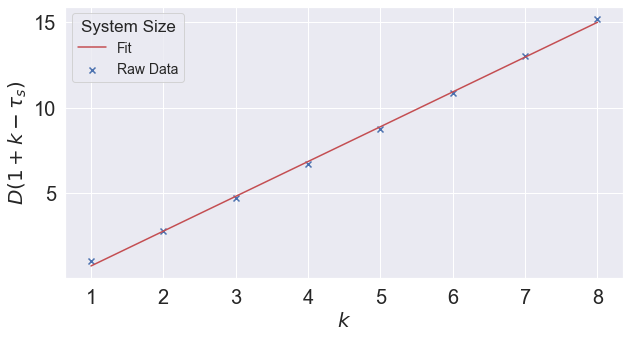

In [70]:

# Plot k vs gradient to work out D and tau_s
k_s = [1,2,3,4,5,6,7,8]

plt.scatter(k_s,gradients,marker = 'x',label='Raw Data')

# Fit function
popt,pcov = curve_fit(linear,k_s,gradients)
plt.plot(k_s,linear(np.array(k_s),popt[0],popt[1]),'r',label = 'Fit')

plt.xlabel('$k$',fontsize = 20)
plt.ylabel('$D(1+k-\\tau_s)$',fontsize = 20)


print('D = {}'.format(popt[0]))
print('Error = {}'.format(pcov[1][1]))
print('Tau = {}'.format(1 - popt[1]/popt[0]))
print('Error = {}'.format(pcov[0][0]))



plt.tick_params(axis='both',labelsize=20)

plt.legend(loc='best',title = 'System Size',prop={'size':14})


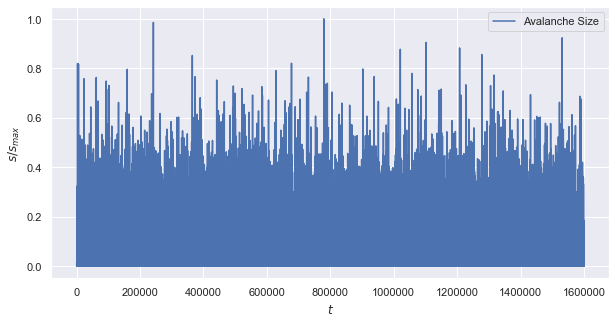

In [71]:
#%% - Create avalanche graph.

s_256 = big_data[256]['s'][int(len(dictionary['h']) / 5):]
s_256 = s_256 / np.max(s_256)

plt.plot(s_256,label = 'Avalanche Size')
plt.xlabel('$t$')
plt.ylabel('$s / s_{max}$')
plt.legend(loc='best')

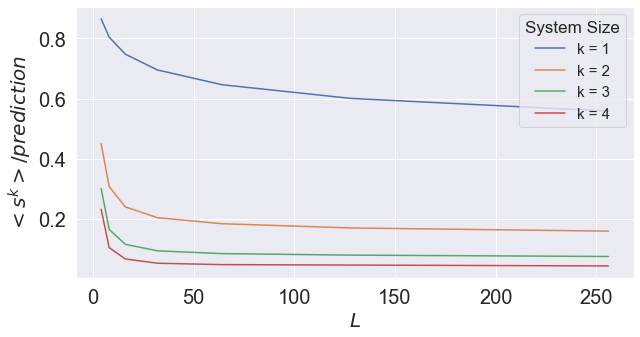

In [72]:
#%% - TASK 3C: Correction to scaling comparison
k_s = [1,2,3,4]

for i in range(len(k_s)):
    
    prediction = np.power(L,2.21*(1 +k_s[i] - 1.5))
    plt.plot(L,moment_df[i]/prediction,\
                label = 'k = ' + str(k_s[i]))


# Note that python has had big issues with massive numbers. To get over this,
    # I fit the log of the values and not the actual values
    
    
plt.xlabel('$L$',fontsize = 20)
plt.ylabel('$<s^k>/prediction$',fontsize = 20)

plt.tick_params(axis='both',labelsize=20)

plt.legend(loc='best',title = 'System Size',prop={'size':15})